In [1]:
import numpy as np
import matplotlib.pyplot as plt
#This first step is to aquire data to conpared the two walks
#Special RW, our Poisson distributed time steps
Nr= 5800#number of realizations
Nt= 1200 #number of timesteps
L= 5 #lambda
x= np.zeros((Nr, Nt)) #the zero placeholder
for r in range (Nr):  
    np.random.seed(r)
    y= np.random.poisson(L,Nt)
    tmp=  2 * np.random.randint(0, 1 + 1,  Nt) - 1 #tmp is just a temporary name for my np.random.poisson
    dirstp= np.multiply(y,tmp)
    x[r,:]=dirstp[:] #this says my x is equal to my temporary name function and it seperates each realizations by rows
Lx = np.cumsum(x, axis=1)
m= np.mean(Lx, axis=0)
v= np.var(Lx, axis=0) # it is squared
t= np.arange(Nt)
print('m=', m)
print(v)   
#Normal RW code below which is the standard random walk just with the same lamda value as our special
n_stories =5800
t_max = 1200
# we add one since we started at zero
t = np.arange(t_max)+1
L=5
steps=np.zeros((n_stories, t_max))
#Add a loop with index slicing
for i in range(n_stories):
        np.random.seed(i+1)
        tnp_steps= 2 * np.random.randint(0, 1 + 1,  t_max) - 1
        steps[i,:]= L*tnp_steps[:]
#x is the steps we take either -1 left or 1 right
x = np.cumsum(steps, axis=1)
# we want to know the aveplt.plot(t, x_var)
x_m=np.mean(x, axis=0)
x_v=np.var(x, axis=0)
print(x)

m= [0.01724138 0.09396552 0.12672414 ... 1.98982759 2.09258621 2.13275862]
[3.03779786e+01 6.04703084e+01 9.10706651e+01 ... 3.64987987e+04
 3.65121826e+04 3.65647944e+04]
[[   5.   10.    5. ... -170. -175. -180.]
 [  -5.    0.    5. ... -120. -125. -130.]
 [  -5.  -10.   -5. ... -260. -265. -270.]
 ...
 [   5.    0.    5. ...  230.  235.  230.]
 [   5.    0.    5. ...  390.  395.  390.]
 [  -5.    0.   -5. ... -190. -185. -180.]]


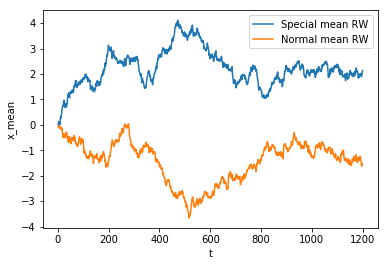

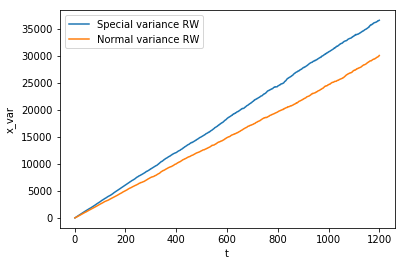

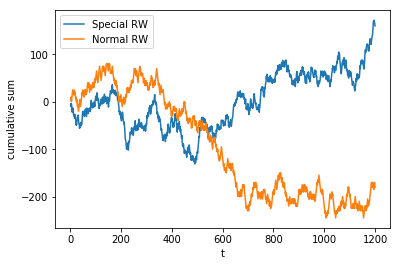

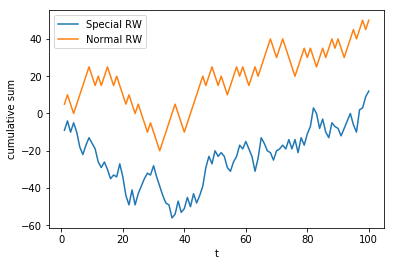

In [6]:
plt.plot(t, m, label ='Special mean RW')
plt.plot(t, x_m, label= 'Normal mean RW')
plt.xlabel('t')
plt.ylabel('x_mean')
plt.legend()
plt.show()
plt.plot(t, v, label= 'Special variance RW')
plt.plot(t, x_v, label= 'Normal variance RW')
plt.xlabel("t")
plt.ylabel("x_var")
plt.legend()
plt.show()
plt.plot(t, Lx[0,:], label = 'Special RW')
plt.plot(t, x[0,:], label = 'Normal RW')
plt.xlabel("t")
plt.ylabel("cumulative sum")
plt.legend()
plt.show()
#We are curious if there are distinguishing features at smaller intervals, unfortuanately we cannot find them
plt.plot(t[0:100], Lx[0,0:100], label = 'Special RW')
plt.plot(t[0:100], x[0,0:100], label = 'Normal RW')
plt.xlabel("t")
plt.ylabel("cumulative sum")
plt.legend()
plt.show()


In [3]:
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
LogisticRegression()
y1= np.zeros(Nr)
y2 = np.ones(n_stories)
y= np.concatenate((y1,y2),axis =None)
print(y)
c = np.concatenate((Lx,x), axis=0)
print(c.shape)
print(Lx.shape)
print(x.shape)
X_train, X_test, y_train, y_test = train_test_split(c, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)




[0. 0. 0. ... 1. 1. 1.]
(11600, 1200)
(5800, 1200)
(5800, 1200)
Accuracy of logistic regression classifier on test set: 0.49
[[851 868]
 [892 869]]


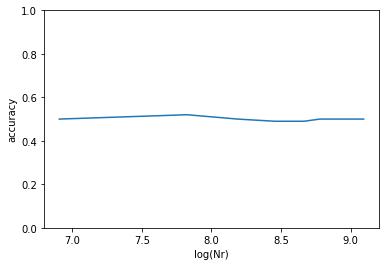

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x=np.log([1000,2500,3600,4700,5800,6500,7500,8900])
y=np.array([0.5,0.52,0.5,0.49,0.49,0.5,0.5,0.5])
plt.plot(x,y)
plt.ylim(bottom=0, top=1)
plt.xlabel("log(Nr)")
plt.ylabel("accuracy")
plt.show()


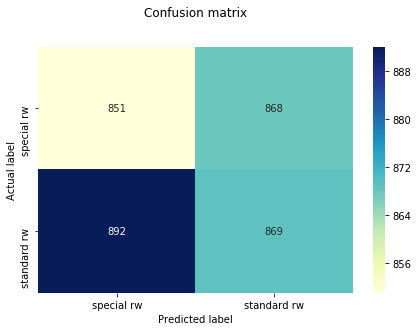

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['special rw', 'standard rw']); 
ax.yaxis.set_ticklabels(['special rw', 'standard rw']);
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
Nr_test= 10#number of realizations
Nt_test= 1200 #number of timesteps
bignumber=10000
L= 5 #lambda
x= np.zeros((Nr_test, Nt_test)) #the zero placeholder
for r in range(Nr_test):  
    np.random.seed(bignumber+r)
    y= np.random.poisson(L,Nt)
    tmp=  2 * np.random.randint(0, 1 + 1,  Nt) - 1 #tmp is just a temporary name for my np.random.poisson
    dirstp= np.multiply(y,tmp)
    x[r,:]=dirstp[:] #this says my x is equal to my temporary name function and it seperates each realizations by rows
Lx = np.cumsum(x, axis=1)
m= np.mean(Lx, axis=0)
v= np.var(Lx, axis=0) # it is squared
t= np.arange(Nt) 
#Normal RW code below
n_stories_test= 10
t_max_test= 1200
# we add one since we started at zero
t = np.arange(t_max)+1
L=5
steps=np.zeros((n_stories_test, t_max_test))
#Add a loop with index slicing
for i in range(n_stories_test):
        np.random.seed(bignumber+i)
        tnp_steps= 2 * np.random.randint(0, 1 + 1,  t_max) - 1
        steps[i,:]= L*tnp_steps[:]
#x is the steps we take either -1 left or 1 right
x = np.cumsum(steps, axis=1)
# we want to know the aveplt.plot(t, x_var)
x_m=np.mean(x, axis=0)
x_v=np.var(x, axis=0)
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
c = np.concatenate((Lx,x), axis=0)
y_pred = logreg.predict(c)
print(y_pred[0:20])

[1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
